In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# Reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
from sqlalchemy import inspect

In [27]:
print("Measurement Columns:")
Inspector = inspect(engine)
measurement_columns = Inspector.get_columns('Measurement')
for column in measurement_columns:
    print(column["name"], column["type"])

print("------")
print("Station Columns:")
station_columns = Inspector.get_columns("station")
for column in station_columns:
    print(column["name"], column["type"])

Measurement Columns:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
------
Station Columns:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [31]:
# Find the most recent date in the data set.
sel=[Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs]

session.query(*sel).order_by(Measurement.date.desc()).first()

# The most recent date is 2017-08-23.

(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)

In [81]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent = session.query(*sel).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp, columns = ["Date", "Precipitation"])
prcp_df.set_index("Date", inplace=True)

# Sort the dataframe by date
prcp_df = prcp_df.sort_values("Date", ascending=True)

# Drop any null values
prcp_df = prcp_df.dropna(how="any") 
prcp_df.head() # The DateFrame contains 2021 rows

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


In [83]:
# Use Pandas Plotting with Matplotlib to plot the data
# Set variables
x_variables = prcp_df.index.tolist()
y_variables = prcp_df["Precipitation"].tolist()

plt.figsize = (12,6)
#prcp_df.plot(kind="bar", ylabel="Inches", xlabel="Date")
#plt.xticks(rotation=90)

[0.0,
 1.79,
 0.05,
 0.15,
 0.7,
 0.02,
 0.08,
 2.15,
 2.28,
 1.45,
 1.22,
 2.15,
 0.08,
 0.0,
 0.21,
 0.06,
 0.0,
 0.11,
 0.08,
 0.03,
 0.01,
 0.0,
 0.04,
 0.02,
 0.0,
 0.18,
 0.12,
 0.0,
 0.0,
 0.02,
 0.6,
 0.14,
 0.01,
 0.14,
 0.14,
 2.07,
 0.0,
 0.04,
 0.0,
 0.17,
 0.9,
 0.35,
 0.0,
 0.02,
 0.0,
 0.05,
 0.0,
 0.0,
 0.1,
 0.24,
 0.13,
 2.46,
 0.25,
 0.0,
 0.02,
 0.0,
 0.01,
 0.0,
 0.0,
 0.03,
 0.02,
 0.01,
 0.19,
 1.0,
 0.08,
 0.12,
 0.0,
 0.07,
 0.03,
 0.14,
 0.74,
 0.03,
 0.44,
 0.02,
 0.03,
 0.11,
 0.18,
 0.05,
 0.03,
 1.0,
 0.11,
 0.04,
 0.16,
 0.05,
 0.11,
 0.1,
 1.35,
 0.23,
 0.07,
 0.01,
 0.15,
 0.22,
 0.01,
 0.0,
 0.23,
 0.35,
 0.29,
 0.01,
 0.03,
 0.16,
 0.0,
 0.14,
 1.16,
 0.01,
 0.09,
 0.3,
 0.12,
 0.18,
 0.05,
 0.6,
 1.04,
 0.04,
 0.31,
 0.0,
 0.15,
 0.02,
 1.2,
 0.32,
 0.46,
 0.34,
 0.37,
 1.32,
 0.9,
 1.19,
 1.84,
 6.7,
 2.33,
 0.42,
 0.17,
 0.12,
 0.07,
 3.35,
 0.83,
 0.61,
 0.0,
 0.06,
 0.07,
 0.06,
 0.01,
 0.01,
 0.0,
 0.23,
 0.04,
 0.36,
 0.05,
 0.0,
 0.07,
 0.04,


In [71]:
# Use Pandas to calcualte the summary statistics for the precipitation data
major_tick = np.arange(1,400,80)
plt.xticks(major_tick)

array([  1,  40,  79, 118, 157, 196, 235, 274, 313, 352, 391])

# Exploratory Station Analysis

<AxesSubplot:xlabel='Date'>

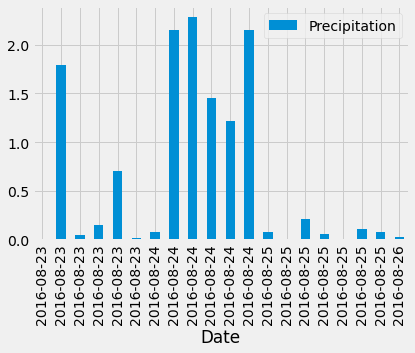

In [80]:
# Design a query to calculate the total number stations in the dataset
prcp_df_sample = prcp_df.head(20)
prcp_df_sample.plot(kind="bar")

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()